<a href="https://colab.research.google.com/github/YashNHanabar/FeynnLabsInternship/blob/main/McD_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score



In [2]:
# Load the dataset
mcdonalds = pd.read_csv("/content/mcdonalds.csv")

# Print column names
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [3]:
# Check dimensions of the dataset
print(mcdonalds.shape)

(1453, 15)


In [4]:
# Display the first 3 rows
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [5]:
# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
column_means = np.round(MD_x.mean(axis=0), 2)

# Print column names with means
for column_name, mean in zip(mcdonalds.columns[:11], column_means):
    print(f"{column_name}: {mean}")

yummy: 0.55
convenient: 0.91
spicy: 0.09
fattening: 0.87
greasy: 0.53
fast: 0.9
cheap: 0.6
tasty: 0.64
expensive: 0.36
healthy: 0.2
disgusting: 0.24


In [6]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Create a DataFrame for summary
summary_df = pd.DataFrame({
    "Standard Deviation": pca.explained_variance_,
    "Proportion of Variance": pca.explained_variance_ratio_,
    "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)
}, index=[f"PC{i+1}" for i in range(len(pca.explained_variance_))])

# Print summary
print(summary_df)

      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             0.573124                0.299447               0.299447
PC2             0.369002                0.192797               0.492244
PC3             0.254641                0.133045               0.625290
PC4             0.159040                0.083096               0.708386
PC5             0.113842                0.059481               0.767866
PC6             0.096270                0.050300               0.818166
PC7             0.083925                0.043849               0.862015
PC8             0.075692                0.039548               0.901563
PC9             0.070358                0.036761               0.938323
PC10            0.061922                0.032353               0.970677
PC11            0.056123                0.029323               1.000000


In [7]:
# Print factor loadings (components)
print(pca.components_.round(1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


In [8]:
# Get the column names
column_names = mcdonalds.columns[:11]

# Get the rotation matrix
rotation_matrix = pca.components_

# Create DataFrame for rotation matrix and transpose it
rotation_matrix_df = pd.DataFrame(rotation_matrix.T, index=column_names, columns=[f"PC{i+1}" for i in range(rotation_matrix.shape[0])])

# Print transposed rotation matrix DataFrame
print(rotation_matrix_df)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

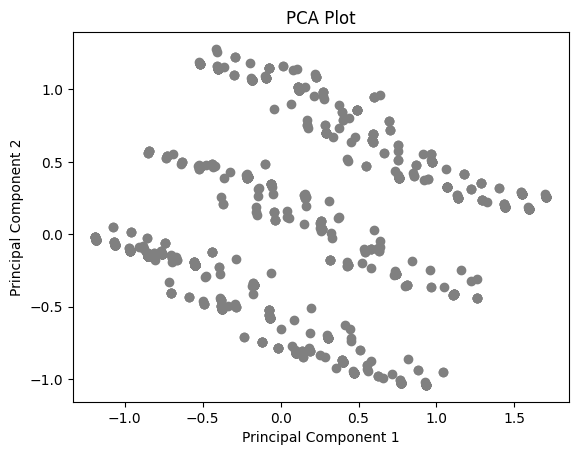

In [9]:
# Plot PCA
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# # Plot projection axes
# plt.figure()
# for length, vector in zip(pca.explained_variance_, pca.components_):
#     plt.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Projection Axes')
# plt.grid()
# plt.show()

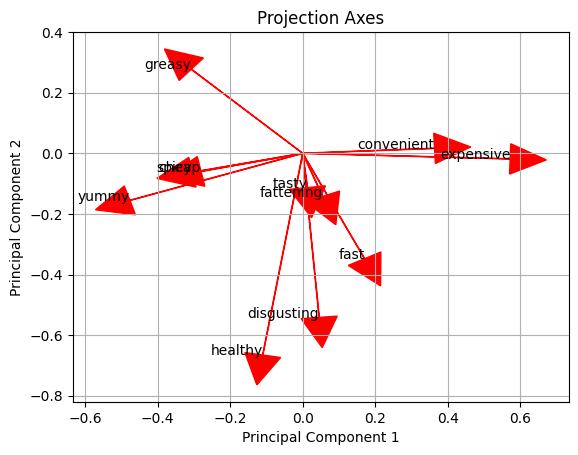

In [10]:
# Plot projection axes
plt.figure()
for length, vector, column_name in zip(pca.explained_variance_, pca.components_, column_names):
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(vector[0], vector[1], column_name, ha='right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection Axes')
plt.grid()
plt.show()

In [30]:

# # Create figure and axes
# fig, ax = plt.subplots()

# # Plot PCA scatter plot
# ax.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', label='PCA Scatter Plot')

# # Plot projection axes
# for length, vector, column_name in zip(pca.explained_variance_, pca.components_, column_names):
#     ax.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
#     ax.text(vector[0], vector[1], column_name, ha='right')

# # Set labels and title
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_title('Combined PCA Plot with Projection Axes')
# ax.grid()

# # Show plot
# plt.show()

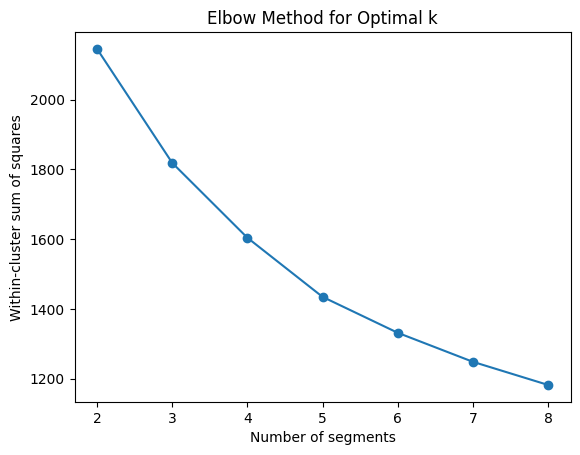

In [11]:
# Set random seed
np.random.seed(1234)

# Perform KMeans clustering with different numbers of clusters
k_range = range(2, 9)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method for Optimal k')
plt.show()

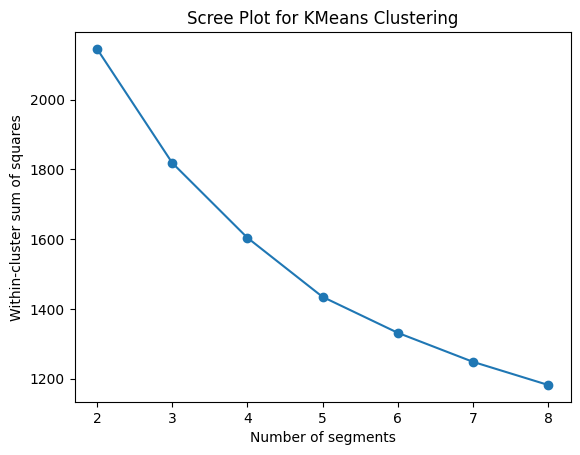

In [12]:

# Set random seed
np.random.seed(1234)

# Perform KMeans clustering with different numbers of clusters
k_range = range(2, 9)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot the scree plot
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares')
plt.title('Scree Plot for KMeans Clustering')
plt.show()


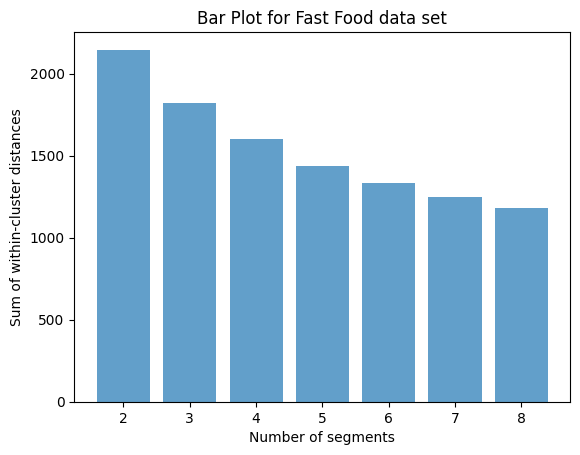

In [13]:

# Plot the bar plot
plt.bar(k_range, inertia_values, align='center', alpha=0.7)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within-cluster distances')
plt.title('Bar Plot for Fast Food data set')
plt.xticks(k_range)
plt.show()

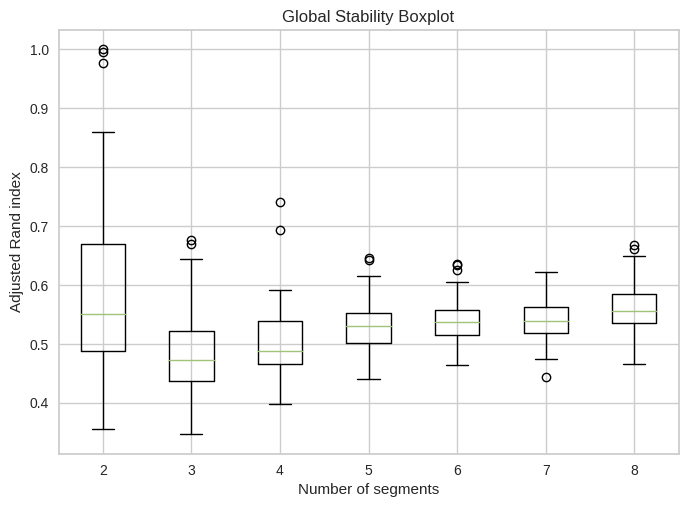

In [51]:
# Set random seed
np.random.seed(1234)

# Number of bootstrap samples
nboot = 100

# Number of random initializations
nrep = 10

# Perform bootstrapped KMeans clustering with different numbers of clusters
k_range = range(2, 9)
stability_scores = []

for k in k_range:
    bootstrap_scores = []
    for _ in range(nboot):
        # Bootstrap sample
        idx = np.random.choice(range(len(MD_x)), size=len(MD_x), replace=True)
        bootstrap_sample = MD_x[idx]

        # KMeans clustering with multiple initializations
        kmeans_scores = []
        for _ in range(nrep):
            kmeans = KMeans(n_clusters=k, n_init=1, random_state=None)  # Random state is None to ensure different initializations
            kmeans.fit(bootstrap_sample)
            kmeans_scores.append(kmeans.labels_)

        # Calculate adjusted Rand index for each pair of clusterings
        pairwise_stability = []
        for i in range(nrep):
            for j in range(i + 1, nrep):
                pairwise_stability.append(adjusted_rand_score(kmeans_scores[i], kmeans_scores[j]))

        # Average pairwise adjusted Rand index as stability score for this bootstrap sample
        bootstrap_scores.append(np.mean(pairwise_stability))

    stability_scores.append(bootstrap_scores)

# Plot the global stability boxplot
plt.boxplot(stability_scores, labels=k_range)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Global Stability Boxplot')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1234)

# Function to calculate global stability
def calculate_global_stability(data, min_segments=2, max_segments=8, nboot=100, nrep=10):
    stability_scores = []

    for n_segments in range(min_segments, max_segments + 1):
        segment_stabilities = []

        for _ in range(nboot):
            bootstrap_samples = []

            for _ in range(nrep):
                # Generate bootstrap sample
                bootstrap_sample = resample(data)
                bootstrap_samples.append(bootstrap_sample)

            # Perform k-means clustering on bootstrap samples
            kmeans_results = []

            for sample in bootstrap_samples:
                kmeans = KMeans(n_clusters=n_segments, n_init=10)  # Explicitly set n_init
                kmeans.fit(sample)
                kmeans_results.append(kmeans.labels_)

            # Calculate adjusted Rand index for each pair of results
            pairwise_ari = []

            for i in range(nrep):
                for j in range(i + 1, nrep):
                    ari = adjusted_rand_score(kmeans_results[i], kmeans_results[j])
                    pairwise_ari.append(ari)

            # Calculate stability score for this bootstrap sample
            stability_score = np.median(pairwise_ari)
            segment_stabilities.append(stability_score)

        stability_scores.append(segment_stabilities)

    return np.array(stability_scores)

# Example data (replace with your data)
# Assuming MD.x is your dataset
# Replace this with your actual data
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate global stability
global_stability = calculate_global_stability(MD_x)

# Plot boxplot
plt.boxplot(global_stability.T)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.show()
